# In the name of ALLAH

In [1]:
# import library that we need 

import pandas as pd
import numpy as np
import shap
import xgboost

from IPython.display import display

/home/soophist/LifeExpectancy_DataAnalysis/life_expectancy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# proprocess data for fit model 

df = pd.read_csv("primary_dataset.csv")

features_drop = ['Country', 'Year', 'Region', 'Life_expectancy', 'Economy_status_Developing']
X = df.drop(columns=features_drop, axis=1)

y = df.Life_expectancy

In [5]:
# create and fit model

model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=3)
model.fit(X,y)
model.predict(X)

array([63.47212 , 63.00829 , 62.559616, ..., 43.628246, 43.98841 ,
       44.37427 ], dtype=float32)

In [7]:
# explain shap

explainer = shap.TreeExplainer(model,X)
explanation = explainer(X)

 98%|===================| 2797/2864 [00:19<00:00]        

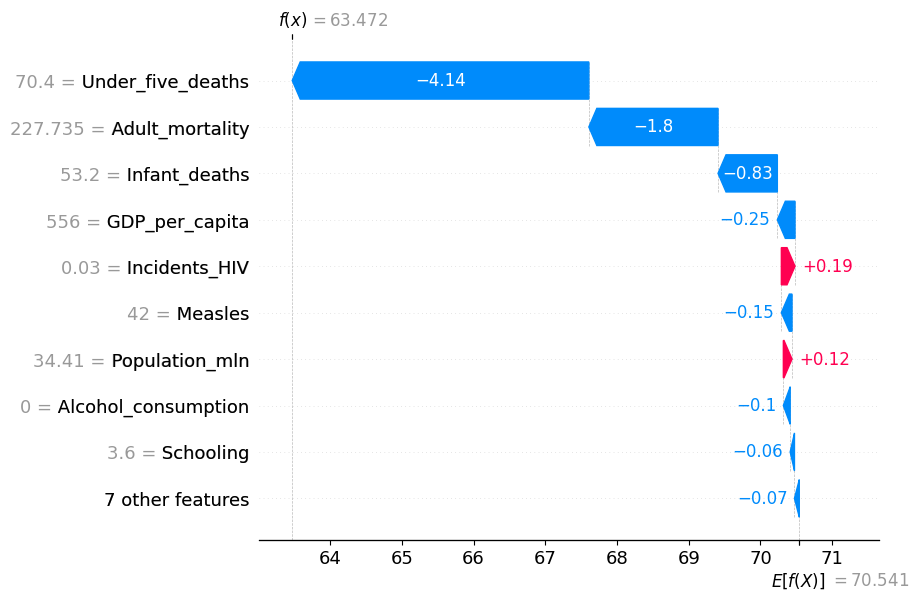

In [9]:
shap.plots.waterfall(explanation[0])

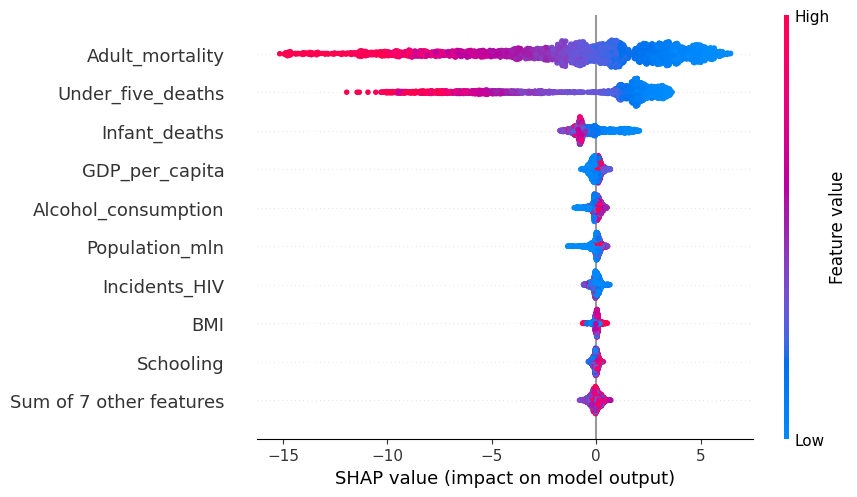

In [11]:
shap.plots.beeswarm(explanation)

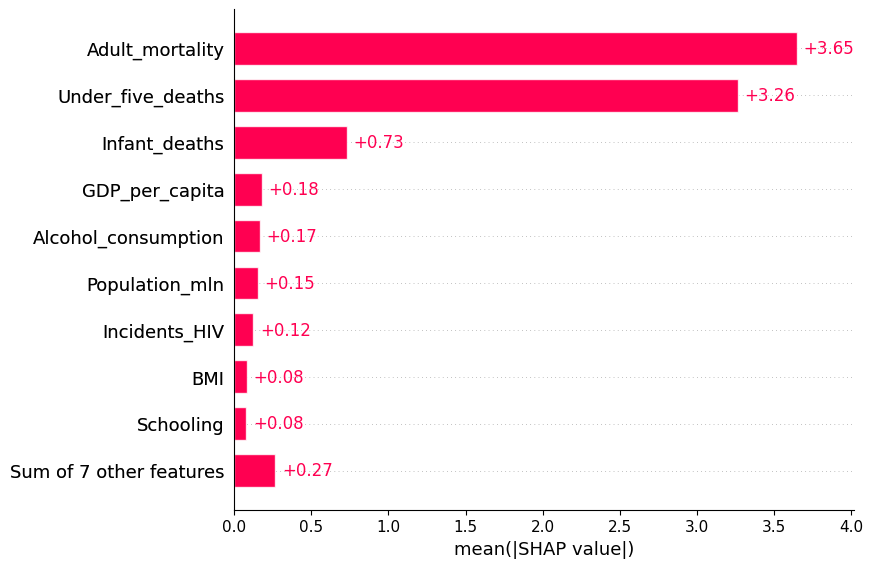

In [13]:
shap.plots.bar(explanation)